In [5]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt

In [6]:
def image(a1, a2):
    fig, ax = plt.subplots()
    ax.plot(a1, a2, '--', color = 'darkblue')
    ax.grid()
    plt.show()

### Решение задачи Коши

In [10]:
class Cauchy_problem:
    def __init__(self, alpha, beta, L1, L2, f):
        self.alpha, self.L1, self.L2, self.f = alpha, L1, L2, f
        self.beta = beta
        
    def z_(self, x, y, z):
        return self.f.subs({symbols('x'): x, symbols('y'): y, symbols('z'): z})

    def y_iteration(self, y, z, h):
        return y + h * z

    def z_iteration(self, x, y, z, h):
        return z + h * self.z_(x, y, z)

    def solve_ZK(self):
        N = 100
        h = (self.L2 - self.L1) / N
        arr_x, arr_y = [], []

        x0, y0, z0 = self.L1, self.beta, self.alpha
        x, y, z = x0, y0, z0
        arr_x.append(x0)
        arr_y.append(y0)

        for i in range(N):
            y_new = self.y_iteration(y, z, h)
            z_new = self.z_iteration(x, y, z, h)
            x_new = x + h
            x, y, z = x_new, y_new, z_new
            arr_x.append(x)
            arr_y.append(y)
        self.x, self.y = arr_x, arr_y
        
    def print_solution(self):
        print('Решение на отрезке [0, ' + str(L2) + ']:')
        for i in range(len(self.x)):
            print('y(' + str(round(self.x[i], 2)) + ') = ', round(self.y[i], 5))
        
    def solve(self):
        self.solve_ZK()
        self.print_solution()
        image(self.x, self.y)

### Реализация решения методом пристрелки

In [56]:
class shooting_procedure:
    def __init__(self, f, L1, L2, A, B):
        self.M = 5
        self.L1, self.L2 = L1, L2
        self.f = f
        self.A, self.B = A, B
        return
    
    def y(self, alpha):
        S = Cauchy_problem(alpha, self.A, self.L1, self.L2, self.f)
        S.solve_ZK()
        return S.y[len(S.y) - 1]

    def F(self, alpha):
        return self.y(alpha) - self.B

    def der_F(self, al):
        h = 1e-3
        return (self.F(al + h) - self.F(al)) / h

    def alpha_(self, al):
        return al - self.F(al) / self.der_F(al)
    
    def print_solution(self):
        print('Количество итераций поиска альфы =', self.i)
        for i in range(len(self.x)):
            print('y(' + str(round(self.x[i], 2)) + ') = ', round(self.y[i], self.M))
    
    def shooting(self):
        eps = 10 ** (-self.M)
        alpha = (self.B - self.A) / (self.L2 - self.L1)
        i = 0
        while 1:
            i += 1
            if abs(self.F(alpha)) > eps:
                alpha = self.alpha_(alpha)
            else:
                b = False
                S = Cauchy_problem(alpha, self.A, self.L1, self.L2, self.f)
                S.solve_ZK()
                self.x, self.y = S.x, S.y
                self.i = i
                self.alpha = alpha
                return
    
    def shoot(self):
        self.shooting()
        #self.print_solution()
        image(self.x, self.y)

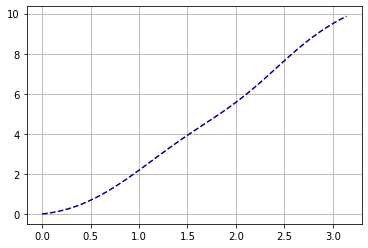

In [57]:
# Задание функции z = f(x, y, z)
x, y, z = symbols('x y z')
def f(p, x, y, z):
    if p == 1:
        return (x**2 - 3) * (z + y * cos(x))
    if p == 2:
        return 2 - 6*x + 2*x**3 + (x**2 - 3) * exp(x) * sin(x) * (1 + cos(x))
    if p == 3:
        return cos(x) * (exp(x) + (x**2 - 1) + x**4 - 3*x**2)
    if p == 4:
        return -f(1, x, y, z) + f(2, x, y, z) + f(3, x, y, z)
g = f(4, x, y, z)


# Задание параметров задачи
A, B = 0, pi**2
L1, L2 = 0, np.pi

P = shooting_procedure(g, L1, L2, A, B)
P.shoot()

In [5]:
def find_solution(x, y, x0):
    for i in range(1, len(y)):
        if x[i - 1] < x0 and x0 < x[i]:
            return float((y[i - 1] + y[i]) / 2)
    
arr = [0.5, 1, 1.5, 2, 2.5, 3]
f = []
for i in range(len(arr)):
    f.append(find_solution(P.x, P.y, arr[i]))

f = np.array(f).round(5)
for i in range(len(f)):
    print('f(' + str(arr[i]) + ')\t= ' + str(f[i]))

f(0.5)	= 0.69799
f(1)	= 2.07702
f(1.5)	= 3.76857
f(2)	= 5.35677
f(2.5)	= 7.20861
f(3)	= 9.6504


In [14]:
print(float(P.alpha))

0.517410434922083


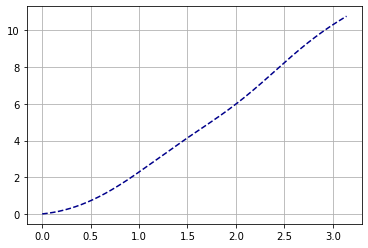

In [62]:
def g(p, x, y, z):
    if p == 1:
        return (x**2 - 3) * (z + y * np.cos(x))
    if p == 2:
        return 2 - 6*x + 2*x**3 + (x**2 - 3) * np.exp(x) * np.sin(x) * (1 + np.cos(x))
    if p == 3:
        return np.cos(x) * (np.exp(x) + (x**2 - 1) + x**4 - 3*x**2)
    if p == 4:
        return -g(1, x, y, z) + g(2, x, y, z) + g(3, x, y, z)

def dy_dt(y, z, alpha):
    return z

def dz_dt(t, y, z):
    return g(4, t, y, z)

def f(t, u, alpha):
    a1 = dy_dt(u[0], u[1], alpha)
    a2 = dz_dt(t, u[0], u[1])
    return np.array([a1, a2])

def RK4(t, u, h): 
    k1 = h * f(t, u, alpha)
    k2 = h * f(t + (1/2)*h, u + (1/2)*k1, alpha)
    k3 = h * f(t + (1/2)*h, u + (1/2)*k2, alpha)
    k4 = h * f(t + h, u + k3, alpha)
    return u + (k1/6) + (k2/3) + (k3/3) + (k4/6)

def solve_(alpha):
    u = np.array([0, alpha])
    u_ = [u]

    t = 0
    h = 1e-4
    T = np.pi
    while t < T:
        u = RK4(t, u, h)
        u_.append(u)
        t += h
    arr_x = np.linspace(0, T, num = int(T/h)+2)

    u_ = np.array(u_)
    arr_y, arr_z = [], []
    for i in range(len(u_)):
        arr_y.append(u_[i][0])
        arr_z.append(u_[i][1])
    return arr_y

c = solve_(alpha)
image(np.linspace(0, np.pi, num = len(c)), c)

In [66]:
class shooting_procedure:
    def __init__(self, f, L1, L2, A, B):
        self.M = 5
        self.L1, self.L2 = L1, L2
        self.f = f
        self.A, self.B = A, B
        return
    
    def y(self, alpha):
        S = solve_(alpha)
        return S[len(S) - 1]

    def F(self, alpha):
        return self.y(alpha) - self.B

    def der_F(self, al):
        h = 1e-3
        return (self.F(al + h) - self.F(al)) / h

    def alpha_(self, al):
        return al - self.F(al) / self.der_F(al)
    
    def print_solution(self):
        print('Количество итераций поиска альфы =', self.i)
        for i in range(len(self.x)):
            print('y(' + str(round(self.x[i], 2)) + ') = ', round(self.y[i], self.M))
    
    def shooting(self):
        eps = 10 ** (-self.M)
        alpha = (self.B - self.A) / (self.L2 - self.L1)
        i = 0
        while 1:
            i += 1
            if abs(self.F(alpha)) > eps:
                alpha = self.alpha_(alpha)
            else:
                b = False
                S = solve_(alpha)
                self.i = i
                self.alpha = alpha
                self.y = S
                self.x = np.linspace(0, np.pi, num = len(self.y))
                return
    
    def shoot(self):
        self.shooting()
        #self.print_solution()
        image(self.x, self.y)

In [67]:
# Задание функции z = f(x, y, z)
x, y, z = symbols('x y z')
def f__(p, x, y, z):
    if p == 1:
        return (x**2 - 3) * (z + y * cos(x))
    if p == 2:
        return 2 - 6*x + 2*x**3 + (x**2 - 3) * exp(x) * sin(x) * (1 + cos(x))
    if p == 3:
        return cos(x) * (exp(x) + (x**2 - 1) + x**4 - 3*x**2)
    if p == 4:
        return -f__(1, x, y, z) + f__(2, x, y, z) + f__(3, x, y, z)
g = f__(4, x, y, z)


# Задание параметров задачи
A, B = 0, pi**2
L1, L2 = 0, np.pi

P = shooting_procedure(g, L1, L2, A, B)
P.shoot()

TypeError: f() missing 1 required positional argument: 'z'